In [1]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models, layers
import matplotlib.pyplot as plt

In [2]:
(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words = 10000)

In [3]:
def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences) , dimension))
    for i , sequence in enumerate(sequences):
        results[i , sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 9,
    batch_size = 512,
    validation_data = (x_val,y_val)
)

Epoch 1/9
16/16 [==============================] - 35s 181ms/step - loss: 2.6003 - accuracy: 0.5307 - val_loss: 1.7082 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 1s 34ms/step - loss: 1.3901 - accuracy: 0.7137 - val_loss: 1.2641 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 1s 32ms/step - loss: 1.0153 - accuracy: 0.7840 - val_loss: 1.1020 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 27ms/step - loss: 0.7934 - accuracy: 0.8346 - val_loss: 1.0030 - val_accuracy: 0.7940
Epoch 5/9
16/16 [==============================] - 0s 31ms/step - loss: 0.6259 - accuracy: 0.8711 - val_loss: 0.9522 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 0s 29ms/step - loss: 0.4980 - accuracy: 0.8983 - val_loss: 0.9225 - val_accuracy: 0.8210
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.4087 - accuracy: 0.9171 - val_loss: 0.9310 - val_accuracy: 0.8080
Epoch 8/9
16/16 [=

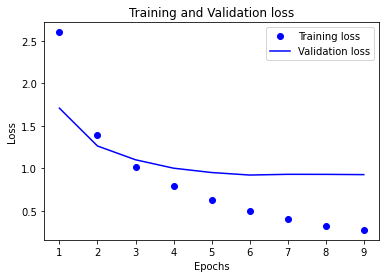

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

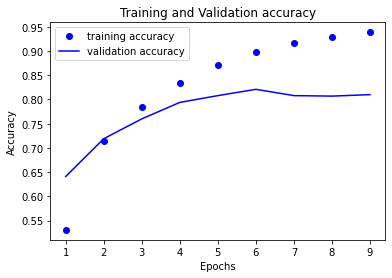

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()